# EDA Part 2: Looking at Two-Variables

Concepts:

Scatterplots
Covariance + Correlation (Linear and Rank???)

Including Categorical Variables

# Scatterplots

So far, we have looked at exploring one variable at a time through summary statistics, histograms, boxplots, etc.

What do we do when we have more than one numeric variable. We can start by visualizing the relationship between the variables through a scatterplot.

A scatterplot can provide a quick view of the general relationship between variables. On a scatterplot, each point corresponds to a single observation.

## Things to Look for in a Scatterplot:

1. **Direction of Association:** Positive or Negative
2. **Form of Associatoin:** Linear? Curved? Neither?
3. **Strength of Association**
4. **Outliers**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv('../data/auto-mpg.csv')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
cars.horsepower = pd.to_numeric(cars.horsepower, errors='coerce')

In [5]:
cars = cars.dropna()

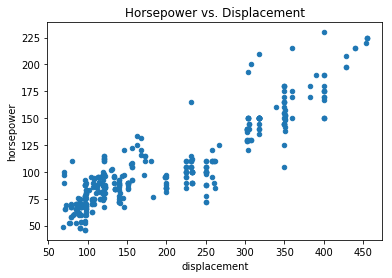

In [6]:
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower')
plt.title('Horsepower vs. Displacement');

What we see is a fairly strong positive association between displacement and horsepower. Cars with greater engine displacement tend to also have larger horsepower. Also, this is a linear trend, meaning we could draw a straight line to describe the association.

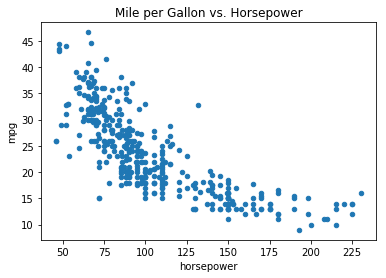

In [21]:
cars.plot(kind = 'scatter', x = 'horsepower', y = 'mpg')
plt.title('Mile per Gallon vs. Horsepower');

On the other hand, there is a negative association between horsepower and mpg, meaning that cars with greater horsepower tend to get worse gas mileage.

This trend appears to be slightly curved when compared to the previous trend.

Also, there is at least one point that stand out for the normal trend: the point with more than 125 horsepower and more than 30 mpg. Let's investigate this point.

In [19]:
cars[(cars.horsepower > 125) & (cars.mpg > 30)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
333,32.7,6,168.0,132.0,2910,11.4,80,3,datsun 280-zx


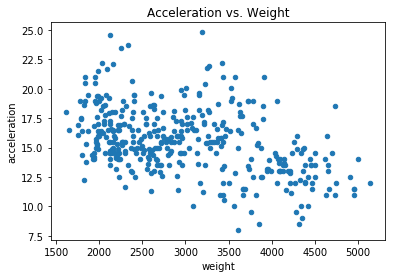

In [22]:
cars.plot(kind = 'scatter', x = 'weight', y = 'acceleration')
plt.title('Acceleration vs. Weight');

Between weight and acceleration, the relationship appears to be weaker, but still roughly linear.

We have seen fairly strong associations between horsepower and displacement and between horsepower and mpg, and a seemingly weaker one between weight and acceleration. What if we want to quantify that relationship?

## Covariance

For a dataset $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ we define the **covariance** as

$$cov(X, Y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

where $\bar{x}$ is the mean of the $x_i$'s and $\bar{y}$ is the mean of the $y_i$'s.

To calculate the covariance of our dataset, we can use the `cov` function from `numpy`. This will return the *covariance matrix*, which shows the variance of each variable separately along with the covariance between variables.

In [8]:
import numpy as np

In [9]:
np.cov(cars.displacement, cars.horsepower)

array([[10950.36755409,  3614.03374393],
       [ 3614.03374393,  1481.56939297]])

The covariance is what is located in the upper right and the lower left entries.

So what does this measure?

Let's look at our scatterplot again.

In [10]:
displacement_mean = cars.displacement.mean()
horsepower_mean = cars.horsepower.mean()

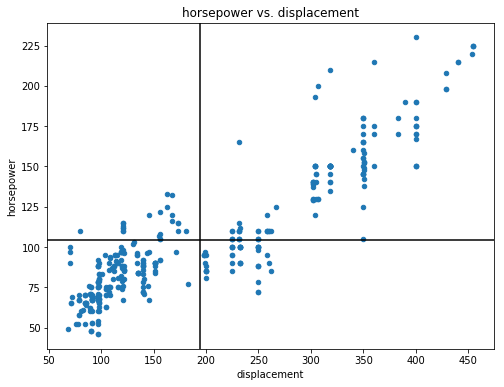

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)
plt.axvline(x = displacement_mean, color = 'black')
plt.axhline(y = horsepower_mean, color = 'black')
plt.title('horsepower vs. displacement');

Points in the upper left quadrant have lower than average payroll and higher than average number of wins. Thus, $(x_i - \bar{x})(y_i - \bar{y})$ will be a negative number times a positive number, so negative overall.

Points in the lower left quadrant have lower than average payroll and lower than average number of wins. Thus, $(x_i - \bar{x})(y_i - \bar{y})$ will be a positive number times a positive number, so positive overall.

Similarly, for points in the upper right quadrant, $(x_i - \bar{x})(y_i - \bar{y})$ will be positive, and for points in the lower right, $(x_i - \bar{x})(y_i - \bar{y})$ will be negative.

If we have more points in the lower left and upper right, when finding the covariance, we will be adding a lot of positive numbers, so the outcome is likely to be positive.

If we have more points in the upper left and lower right, when finding the covariance, we will be adding a lot of negative numbers, so the outcome is likely to be negative.

These two scenarios correspond to a positive trend and a negative trend, respectively.

On the other hand, if points are roughly evenly spread around the four quadrants (no trend), then when finding the covariance, we will be adding a lot of both positive and negative values, so overall, the covariance will be close to zero.

Thus, by examining the sign and the magnitude of the covariance, we can get an idea of the existence or nonexistence of a trend in our data. But there is one major drawback, which is that the magnitude of $(x_i - \bar{x})$ and $(y_i - \bar{y})$ depend on the measurement scale of our variables.

What would be better would be a way to standardize these differences, so that we get a unitless measure of trend. This is exactly what the correlation does.

## (Pearson) Correlation

How can we normalize these differences? The most common way to do it is to convert it into units of standard deviations (by dividing the absolute differences by the standard deviation).

$$ r = \frac{\sum_{i=1}^n \frac{(x_i - \bar{x})}{s_X}\frac{(y_i - \bar{y})}{s_Y}}{n-1} = \frac{cov(X,Y)}{s_X \cdot s_Y} $$

Again, to find the correlation coefficient, we can use `numpy`.

In [13]:
np.corrcoef(cars.displacement, cars.horsepower)

array([[1.      , 0.897257],
       [0.897257, 1.      ]])

This shows that there the correlation between displacement and horsepower is roughly 0.897.

TODO: Add rule of thumb for correlation here.

Note: The pearson correlation measures the strength of a *linear* relationship between variables. That is, how strongly they follow a line. If we want to see this trendline, we can use the polyfit method from numpy. We'll learn much more about this trendline when we talk about linear regression later in the course.

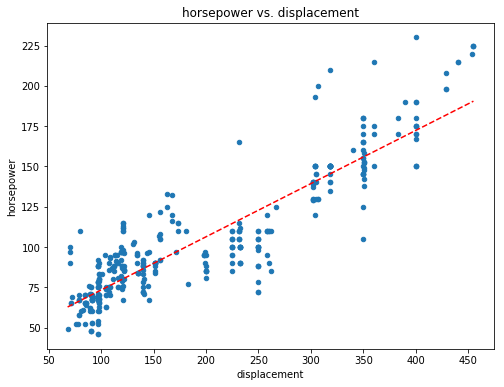

In [15]:
fig, ax = plt.subplots(figsize = (8,6))
cars.plot(kind = 'scatter', x = 'displacement', y = 'horsepower', ax = ax)

x = np.linspace(cars.displacement.min(), cars.displacement.max(), 100)
z = np.polyfit(cars.displacement, cars.horsepower, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('horsepower vs. displacement');

We can also inspect multiple relationships at once using `pandas`.

In [25]:
cars[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'weight']].corr()

,mpg,cylinders,displacement,horsepower,acceleration,weight
mpg,1.000000,-0.777618,-0.805127,-0.778427,0.423329,-0.832244
cylinders,-0.777618,1.000000,0.950823,0.842983,-0.504683,0.897527
displacement,-0.805127,0.950823,1.000000,0.897257,-0.543800,0.932994
horsepower,-0.778427,0.842983,0.897257,1.000000,-0.689196,0.864538
acceleration,0.423329,-0.504683,-0.543800,-0.689196,1.000000,-0.416839
weight,-0.832244,0.897527,0.932994,0.864538,-0.416839,1.000000


To find the correlation between any two variables, find the intersection of the correct row and column.

For example, we see that the correlation between weight and acceleration is -0.417.

It appears that the strongest relationship is between cylinders and displacement.

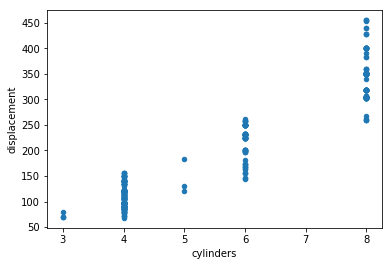

In [27]:
cars.plot(kind = 'scatter', x = 'cylinders', y = 'displacement');

TODO maybe: Add Spearman correlation coefficient.

## Categorical-Categorical

When studying two categorical variables, we can perform *cross-tabulation* to see how the sample is distributed across the categories.

For this example, we'll look at data from the 2018 Central Park Squirrel Census, which can be obtained from https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw.

In [4]:
squirrels = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
squirrels.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


Let's say we are interested in seeing if squirrels of different colors behave differently around humans. We'll be looking specifically at the `Primary Fur Color` and `Runs from` column, which indicates "Squirrel was seen running from humans, seeing them as a threat." We'll be using the `pandas` `crosstab` function for this.

In [6]:
pd.crosstab(squirrels['Primary Fur Color'], squirrels['Runs from'])

Runs from,False,True
Primary Fur Color,,
Black,71,32
Cinnamon,305,87
Gray,1922,551


By default, `crosstab` will return counts, which can give an idea about the relative size of each group, but makes it difficult to assess exact proportions. Luckily, we can normalize our measurements to give relative proportions by specifying the `normalize` argument. To normalize across rows, we can specify `normalize = True`.

In [8]:
pd.crosstab(squirrels['Primary Fur Color'], squirrels['Runs from'], normalize='index')

Runs from,False,True
Primary Fur Color,,
Black,0.689320,0.310680
Cinnamon,0.778061,0.221939
Gray,0.777194,0.222806


Based on this, we can see that a larger proportion of black squirrels run from humans than other colors of squirrels.

We can visualize our findings using a side-by-side barplot.

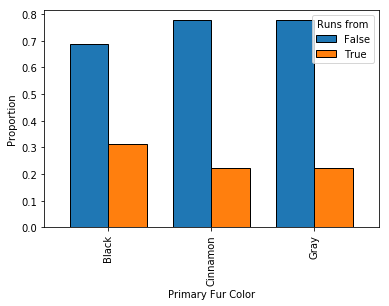

In [16]:
pd.crosstab(squirrels['Primary Fur Color'], squirrels['Runs from'], normalize='index').plot(kind = 'bar',
                                                                                           edgecolor = 'black',
                                                                                           width = 0.75)
plt.ylabel('Proportion');

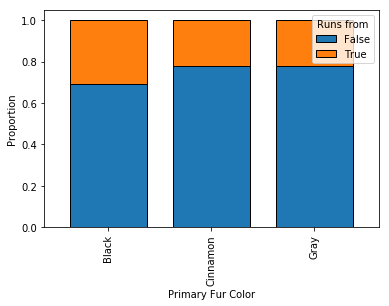

In [17]:
pd.crosstab(squirrels['Primary Fur Color'], squirrels['Runs from'], normalize='index').plot(kind = 'bar',
                                                                                           edgecolor = 'black',
                                                                                           width = 0.75,
                                                                                           stacked = True)
plt.ylabel('Proportion');